In [156]:
# ============================================================================
# PHASE 1 FEATURE ENGINEERING - Derived Features (Safe & Fast)
# ============================================================================

# Purpose: Create difference features that don't require historical aggregation
# These are "point-in-time" features with no data leakage risk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Libraries imported successfully!")

# ============================================================================
# STEP 1: Load Preprocessed Data with Player Context
# ============================================================================

# Load the dataset that includes player IDs and names
df = pd.read_csv('../data/processed/matches_final_with_player_context.csv')

print(f"✓ Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nThe columns are:")
print(df.columns.tolist())
print(f"\nDataset info:")
df.info()


df['tourney_date'].min()

✓ Libraries imported successfully!
✓ Data loaded successfully!
Shape: (124097, 81)

The columns are:
['player1_id', 'player1_name', 'player1_rank', 'player1_rank_imputed', 'player1_ht', 'player1_age', 'player2_id', 'player2_name', 'player2_rank', 'player2_rank_imputed', 'player2_ht', 'player2_age', 'player1_won', 'draw_size', 'tourney_date', 'best_of', 'player1_hand_L', 'player1_hand_R', 'player1_hand_U', 'player2_hand_L', 'player2_hand_R', 'player2_hand_U', 'player1_entry_2) A', 'player1_entry_3)', 'player1_entry_6)', 'player1_entry_6) A', 'player1_entry_8)', 'player1_entry_A', 'player1_entry_AL', 'player1_entry_ALT', 'player1_entry_Alt', 'player1_entry_Direct', 'player1_entry_ITF', 'player1_entry_J', 'player1_entry_LL', 'player1_entry_P', 'player1_entry_PR', 'player1_entry_Q', 'player1_entry_S', 'player1_entry_SE', 'player1_entry_UP', 'player1_entry_W', 'player1_entry_WC', 'player2_entry_3)', 'player2_entry_5) A', 'player2_entry_6) A', 'player2_entry_A', 'player2_entry_AL', 'player2_

20131229

## Simple Feature engineering ( Age / Height / Rank difference )


CREATING DERIVED FEATURES

✓ Created 'rank_difference'
   Range: -2256 to 2255
   Mean: -1.02
   Interpretation: Negative = Player1 better ranked

✓ Created 'age_difference'
   Range: -30.70 to 26.90
   Mean: 0.02
   Interpretation: Positive = Player1 older

✓ Created 'height_difference'
   Range: -193 to 200
   Mean: 0.01
   Interpretation: Positive = Player1 taller

✓ Total new features created: 3
✓ New dataset shape: (124097, 84)


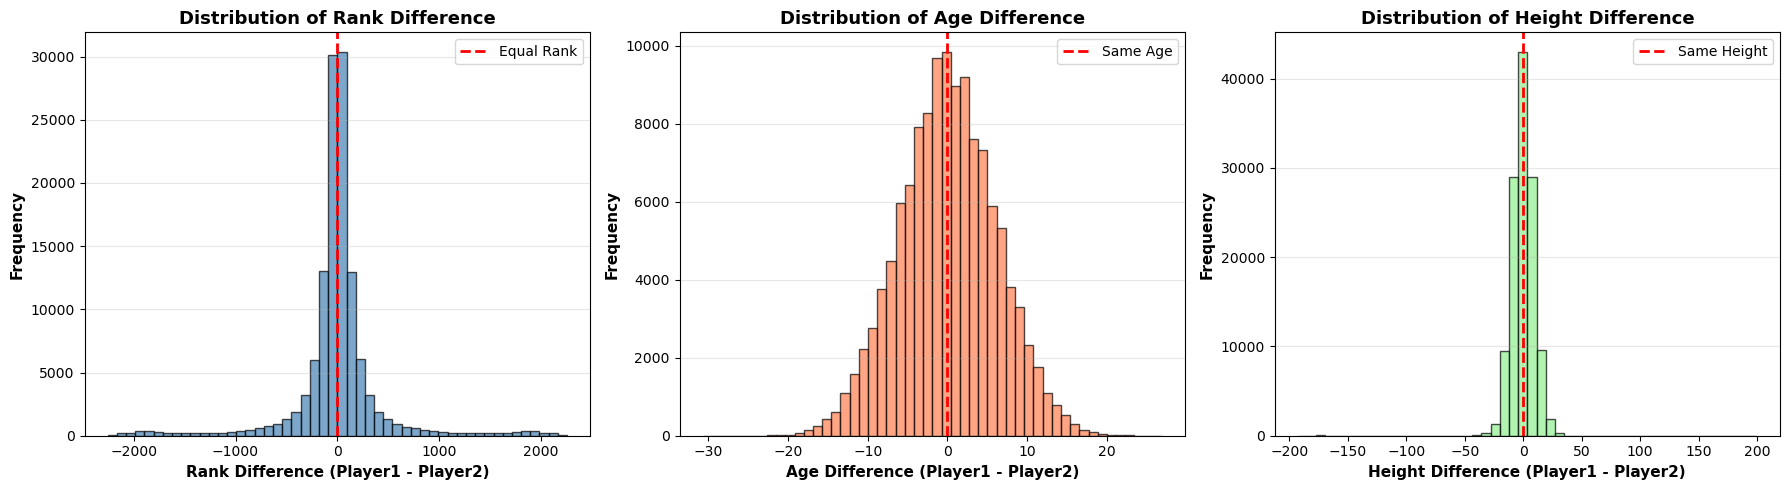


📊 Key Observations:
   • Rank Difference: Most matches have players with similar ranks (centered near 0)
   • Age Difference: Most players are similar in age (centered near 0)
   • Height Difference: Most players have similar heights (centered near 0)

FEATURE CORRELATION WITH TARGET (player1_won)

rank_difference     : -0.2694
   → MODERATE correlation

age_difference      : +0.0198
   → WEAK correlation

height_difference   : +0.0387
   → WEAK correlation


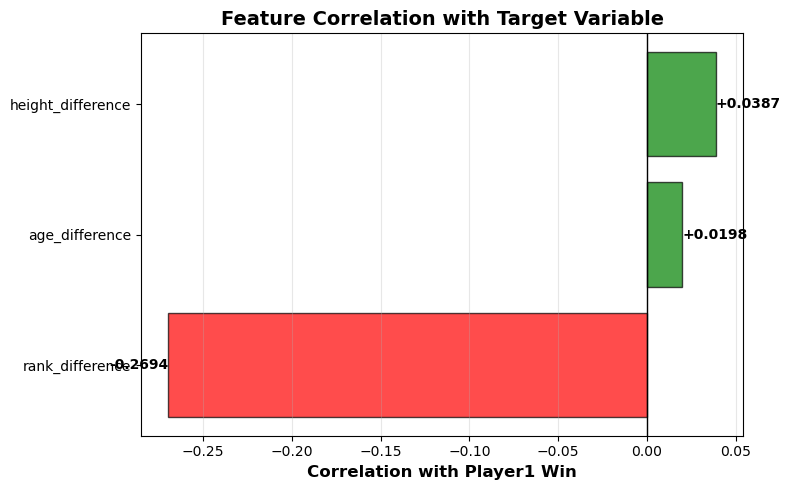


INTERPRETATION:
• Negative rank_difference correlation = Lower rank number (better player) → more likely to win
• This makes sense! The better-ranked player (lower number) should win more often
• Age and height differences have weaker correlations


In [157]:
# ============================================================================
# STEP 2: Create Derived Features (Difference Features)
# ============================================================================

print("\n" + "="*70)
print("CREATING DERIVED FEATURES")
print("="*70)

# 1. RANK DIFFERENCE
# Negative value = Player1 is higher ranked (lower rank number = better)
# Positive value = Player2 is higher ranked
df['rank_difference'] = df['player1_rank'] - df['player2_rank']

print(f"\n✓ Created 'rank_difference'")
print(f"   Range: {df['rank_difference'].min():.0f} to {df['rank_difference'].max():.0f}")
print(f"   Mean: {df['rank_difference'].mean():.2f}")
print(f"   Interpretation: Negative = Player1 better ranked")

# 2. AGE DIFFERENCE
# Positive value = Player1 is older
# Negative value = Player2 is older
df['age_difference'] = df['player1_age'] - df['player2_age']

print(f"\n✓ Created 'age_difference'")
print(f"   Range: {df['age_difference'].min():.2f} to {df['age_difference'].max():.2f}")
print(f"   Mean: {df['age_difference'].mean():.2f}")
print(f"   Interpretation: Positive = Player1 older")

# 3. HEIGHT DIFFERENCE
# Positive value = Player1 is taller
# Negative value = Player2 is taller
df['height_difference'] = df['player1_ht'] - df['player2_ht']

print(f"\n✓ Created 'height_difference'")
print(f"   Range: {df['height_difference'].min():.0f} to {df['height_difference'].max():.0f}")
print(f"   Mean: {df['height_difference'].mean():.2f}")
print(f"   Interpretation: Positive = Player1 taller")

print("\n" + "="*70)
print(f"✓ Total new features created: 3")
print(f"✓ New dataset shape: {df.shape}")
print("="*70)

# ============================================================================
# STEP 3: Visualize New Features and Their Relationship with Target
# ============================================================================

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Rank Difference Distribution
axes[0].hist(df['rank_difference'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Equal Rank')
axes[0].set_xlabel('Rank Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Rank Difference', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Age Difference Distribution
axes[1].hist(df['age_difference'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same Age')
axes[1].set_xlabel('Age Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Age Difference', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Height Difference Distribution
axes[2].hist(df['height_difference'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same Height')
axes[2].set_xlabel('Height Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[2].set_title('Distribution of Height Difference', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print(f"   • Rank Difference: Most matches have players with similar ranks (centered near 0)")
print(f"   • Age Difference: Most players are similar in age (centered near 0)")
print(f"   • Height Difference: Most players have similar heights (centered near 0)")

# ============================================================================
# STEP 4: Analyze Feature Correlation with Target Variable
# ============================================================================

print("\n" + "="*70)
print("FEATURE CORRELATION WITH TARGET (player1_won)")
print("="*70)

# Calculate correlations
correlations = {
    'rank_difference': df['rank_difference'].corr(df['player1_won']),
    'age_difference': df['age_difference'].corr(df['player1_won']),
    'height_difference': df['height_difference'].corr(df['player1_won'])
}

for feature, corr in correlations.items():
    print(f"\n{feature:20s}: {corr:+.4f}")
    if abs(corr) > 0.3:
        print(f"   → STRONG correlation")
    elif abs(corr) > 0.1:
        print(f"   → MODERATE correlation")
    else:
        print(f"   → WEAK correlation")

# Visualize correlation
fig, ax = plt.subplots(figsize=(8, 5))
features = list(correlations.keys())
values = list(correlations.values())
colors = ['red' if v < 0 else 'green' for v in values]

bars = ax.barh(features, values, color=colors, alpha=0.7, edgecolor='black')
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Correlation with Player1 Win', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:+.4f}', 
            ha='left' if width > 0 else 'right',
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("• Negative rank_difference correlation = Lower rank number (better player) → more likely to win")
print("• This makes sense! The better-ranked player (lower number) should win more often")
print("• Age and height differences have weaker correlations")
print("="*70)

## Further Feature engineering - Time aware 

* Surface specific win loss ratio ( Each player ? )
* Head to head 
* Total wins to Total loss each player
* Recent Form ( Last 20 matches )
* Total Games played in ATP matches 

--------

* #### One slight issue with this is that the inital matches will not have enough of a player history to correctly predict the initial matches  - 
    * one potential solution is that I import more matches from before 2013 and then use those to enrich our features but don't use them during training or modeling 

## 1. Career stats ( Easiest to do )


#### APPROACH EXPLANATION:

We need to track each player's career stats BEFORE each match.

*  NAIVE APPROACH (SLOWER But simplier and uses Hash table ):


* VECTORIZED APPROACH (FAST - 10 seconds):
  1. Create a "long format" where each match becomes 2 rows (one per player)
  2. Use groupby + cumsum to calculate running totals
  3. Shift by 1 to get stats from BEFORE current match
  4. Merge back to original format
-----------------------------------------------------------------------------

# A. Vectorized approach 

## Step 1 
* Sorting by date 
* Coverting to Long format


##  Step 2: Calculate the cumulative stats using grouby and cumsum
* Using Cumcount and Cumsum to get total matches and total wins 
* using shift(1) 
* Get cumulative career win rate for each tourney date 
* For first matches replace NAN values of wins and matches before to 0 
* For win rate set it to .5 ( But the model will impute the fact that if they have total matches before = 0 to not trust this )
    * again this can be fixed by feature engineering based off of previous year matches or only training from say dates of 2018 and above


## Step 3: Covert back into wide format so each match is represetned by 1 row 


In [ ]:

# STEP 1: Career Win Rate (FULLY VECTORIZED ⚡)
# ============================================================================

print("\n" + "="*70)
print("STEP 1: CREATING CAREER STATISTICS (VECTORIZED)")
print("="*70)

# -----------------------------------------------------------------------------
# CRITICAL: Sort by date to ensure chronological order
# -----------------------------------------------------------------------------

df = df.sort_values(by='tourney_date', kind= 'stable').reset_index(drop=True) 
# doing stable ensures that the order of the same values of tourney_date is maintained so for ties it will be in the order of the original df

print(f"✓ Data sorted by tourney_date")
print(f"   Date range: {df['tourney_date'].min()} to {df['tourney_date'].max()}")

# -----------------------------------------------------------------------------

# Step 1a: Create "long format" - Each match becomes 2 rows

print("\n Creating the long format for Vectorized calculations")
# Why do we use Long format ? because when we do this such that each match becomes 2 rows (one per player)
# We can cleanly do groupby + cumsum to calculate running totals but when we do it in the wide format 
# Because essentially we would be doing a groupby on player 1 and player 2 and then making sure their IDs match
# up and use that combine to get the running totals [ Not to mention the fact that it has to be in a chronological order ]

# Can we do it in the wide format ? 
# Tehnically yes but there would be two group by and then merge in chronological order and it would be a mess 

# For player 1
player1_rows = df[['tourney_date', 'player1_id', 'player1_won']].copy()
player1_rows.columns = ['tourney_date', 'player_id', 'won']
player1_rows['role'] = 'player1'  # ← CRITICAL!
player1_rows['match_id'] = df.index  # ← CRITICAL!

# For player 2
player2_rows = df[['tourney_date', 'player2_id', 'player1_won']].copy()
player2_rows.columns = ['tourney_date', 'player_id', 'won']
player2_rows['won'] = 1 - player2_rows['won'] # Essentially we are flipping the won column for player 2 because if player 1 won then player 2 lost and vice versa
player2_rows['role'] = 'player2'  # ← CRITICAL!
player2_rows['match_id'] = df.index  # ← CRITICAL!

# Combine
all_matches_long = pd.concat([player1_rows, player2_rows], ignore_index=True)
# Ignore index because if we combine results and keep original index we will have duplicates for the index
# This essentially tells pandas to create a new index from 0 - N-1 
# print ( long_df.loc[2])

all_matches_long = all_matches_long.sort_values(['player_id', 'tourney_date']).reset_index(drop=True)
# When we sort values by two , it will first sort by player_id and then by tourney_date for each player_id
# Reason for sorting by the two columns is because of the shift(1) funciton we'll be using later so its the same playeres 
# Reset_index - converts the current index into a column and then creates a new index from 0 - N-1
# Drop = True - because we don't want to keep the old index column

print(f"✓ Long format created: {len(all_matches_long):,} player-match records")
print(f"   (Each of {len(df):,} matches becomes 2 rows)")


# Step 1b: Calculate CUMULATIVE stats using groupby + cumsum (VECTORIZED!)

# Group the players and get the comulatative sum of wins and total matches for each player based on the tourney_date 
all_matches_long['career_total_matches'] = all_matches_long.groupby('player_id').cumcount() + 1 # +1 because we want to start from 1 and cumcount starts from 0
all_matches_long['career_total_wins'] = all_matches_long.groupby('player_id')['won'].cumsum() # no +1 because we are summing the wins and if its 0 then it will be 0

# Now we shift the values by 1 ( down words because technically the first match of each player will = total matches = 0 )
# Because we want to get the stats from before the current match 

# Will apply shift 1 to the groupby values so we shift within each group of player_id so another players values don't get used
all_matches_long['career_total_matches_before'] = all_matches_long.groupby('player_id')['career_total_matches'].shift(1)
all_matches_long['career_total_wins_before'] = all_matches_long.groupby('player_id')['career_total_wins'].shift(1)

# Now we can calculate the win rate before the match 
# For NaN values i.e the first match for each player we will also get NAN as win rate 
all_matches_long['career_win_rate_before'] = all_matches_long['career_total_wins_before'] / all_matches_long['career_total_matches_before']

# Fill NaN for players' first match (no history yet)
# And for win rate set it to .5 ( But the model will impute the fact that if they have total matches before = 0 to not trust this )
all_matches_long['career_win_rate_before'] = all_matches_long['career_win_rate_before'].fillna(0.5)
all_matches_long['career_total_matches_before'] = all_matches_long['career_total_matches_before'].fillna(0)
all_matches_long['career_total_wins_before'] = all_matches_long['career_total_wins_before'].fillna(0)

#Step 3: Merge back to the original df

# Now to merge back to the original df first filter by role 
player1_stats = all_matches_long[all_matches_long['role'] == 'player1']
player2_stats = all_matches_long[all_matches_long['role'] == 'player2']

# Add match_id to the original DF
df['match_id'] = df.index

# Prepare and merge player1 stats
player1_merge = player1_stats[[
    'match_id', 
    'career_total_matches_before', 
    'career_total_wins_before', 
    'career_win_rate_before'
]].rename(columns={
    'career_total_matches_before': 'player1_career_matches',
    'career_total_wins_before': 'player1_career_wins',
    'career_win_rate_before': 'player1_career_win_rate'
})

# Left means keep all the columns from the left data frame and add matching data from the right data frame i.e player1_merge

df = df.merge(player1_merge, on='match_id', how='left')

# Prepare and merge player2 stats
player2_merge = player2_stats[[
    'match_id', 
    'career_total_matches_before', 
    'career_total_wins_before', 
    'career_win_rate_before'
]].rename(columns={
    'career_total_matches_before': 'player2_career_matches',
    'career_total_wins_before': 'player2_career_wins',
    'career_win_rate_before': 'player2_career_win_rate'
})

df = df.merge(player2_merge, on='match_id', how='left')

# Create difference feature
df['career_win_rate_diff'] = df['player1_career_win_rate'] - df['player2_career_win_rate']


print("Finished Vectorized Career Stats")
print(df.info())
print("✅ Career stats merged successfully!")




STEP 1: CREATING CAREER STATISTICS (VECTORIZED)
✓ Data sorted by tourney_date
   Date range: 20131229 to 20241218

 Creating the long format for Vectorized calculations
✓ Long format created: 248,194 player-match records
   (Each of 124,097 matches becomes 2 rows)
Finished Vectorized Career Stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124097 entries, 0 to 124096
Data columns (total 92 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   player1_id               124097 non-null  int64  
 1   player1_name             124097 non-null  object 
 2   player1_rank             124097 non-null  float64
 3   player1_rank_imputed     124097 non-null  int64  
 4   player1_ht               124097 non-null  float64
 5   player1_age              124097 non-null  float64
 6   player2_id               124097 non-null  int64  
 7   player2_name             124097 non-null  object 
 8   player2_rank             124097 non

## 2. Surface Specific Win loss ratio


For match on date X:
  - Look at player's matches BEFORE date X
  - Count wins on this surface / total matches on this surface
  - player1_clay_win_rate, player1_grass_win_rate, player1_hard_win_rate
  - player2_clay_win_rate, player2_grass_win_rate, player2_hard_win_rate

In [159]:
# Lets drop the unneeded columns
need = ['tourney_date', 'surface_Clay', 'surface_Grass', 'surface_Hard', 'player1_id', 'player2_id', 'player1_won']

df_surface = df[need].copy() # need to copy because there might be a "reference" and changes to the original df might affect the new one

df_surface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124097 entries, 0 to 124096
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   tourney_date   124097 non-null  int64
 1   surface_Clay   124097 non-null  bool 
 2   surface_Grass  124097 non-null  bool 
 3   surface_Hard   124097 non-null  bool 
 4   player1_id     124097 non-null  int64
 5   player2_id     124097 non-null  int64
 6   player1_won    124097 non-null  int64
dtypes: bool(3), int64(4)
memory usage: 4.1 MB


## At the end Drop The indentifying features such as Player ID , and Names ( leave tournament date because we need it to split data )

## Also Drop the redundant features maybe ? 
*  Note will have to take care of the player rank imputed stuff and the other flags I made or maybe just keep them ? ( Think about this later)

In [160]:
df = df.drop(['player1_rank', 'player2_rank', 
                 'player1_age', 'player2_age',
                 'player1_ht', 'player2_ht'], axis=1)

## Save File

In [161]:
df.to_csv('../data/processed/matches_with_engineered_features.csv', index=False)